In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#Loading the dataset
retail=pd.read_excel("C:\\Users\\Vasanth Ragunathan\\Desktop\\Masterclass\\OnlineRetail.xlsx")

In [3]:
# Observations and number of columns
retail.shape

(541909, 8)

In [4]:
# Displaying first five obs
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# Duplicate values
print(f'Duplicate values = {retail.duplicated().sum()}')

Duplicate values = 5268


In [8]:
# Removing duplicate values 
retail = retail[~retail.duplicated()]

In [9]:
#Checking for Duplicate values
print(f'Duplicate values = {retail.duplicated().sum()}')

Duplicate values = 0


In [10]:
#Checking for NA values in each column
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
#Checking for NA values
retail.isnull().sum().sum()

136491

In [12]:
#Deleting NA value
retail = retail.dropna(subset=['CustomerID'])
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
# Creating list of InvoiceNo with no CustomerID records
Invoice_list = retail[retail.CustomerID.isnull()]['InvoiceNo'].tolist()

In [14]:
# Checking the length
len(retail[retail.InvoiceNo.isin(Invoice_list)])    

0

In [15]:
# Removing InvoiceNo with no customerID
rfm_retail = retail[retail.CustomerID.notnull()].copy()

In [16]:
# Conversion of customerId to integer type 
rfm_retail.CustomerID = (rfm_retail.CustomerID).astype(int)

In [17]:
# Removing Cancelled items 
retail_tc = rfm_retail[~rfm_retail.InvoiceNo.str.contains('C', na=False)]

In [18]:
# Adding a variable "TotalCost"
retail_tc['TotalCost'] = rfm_retail.Quantity * rfm_retail.UnitPrice

C:\Users\Vasanth Ragunathan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# Printing the oldest and latest date of purchase.
print(f'Oldest date: {retail_tc.InvoiceDate.min()}\n')
print(f'Latest date: {retail_tc.InvoiceDate.max()}')

Oldest date: 2010-12-01 08:26:00

Latest date: 2011-12-09 12:50:00


In [20]:
# Transaction rates of country
retail_tc.Country.value_counts(normalize=True).head(10).mul(100).round(1).astype(str) + '%'

United Kingdom    88.9%
Germany            2.3%
France             2.1%
EIRE               1.8%
Spain              0.6%
Netherlands        0.6%
Belgium            0.5%
Switzerland        0.5%
Portugal           0.4%
Australia          0.3%
Name: Country, dtype: object

In [21]:
retail["Description"].value_counts

<bound method IndexOpsMixin.value_counts of 0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 401604, dtype: object>

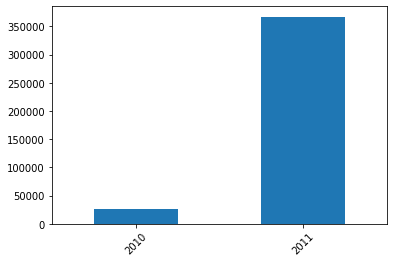

In [22]:
# Number of transactions in different years
retail_tc.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=45);

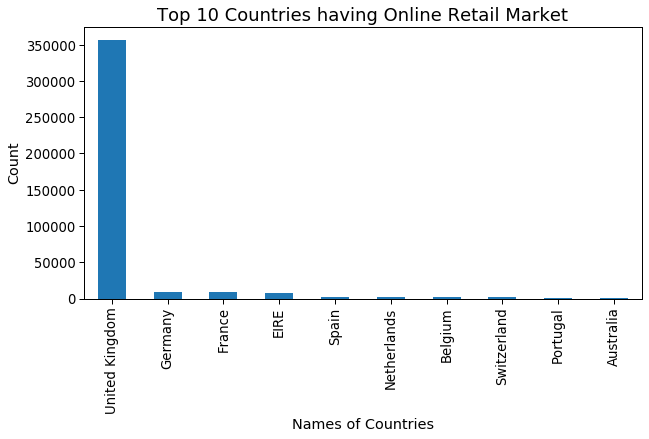

In [99]:
# checking the different values for country in the dataset
retail['Country'].value_counts().head(10).plot.bar(figsize = (10, 5))
plt.title('Top 10 Countries having Online Retail Market', fontsize = 18)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

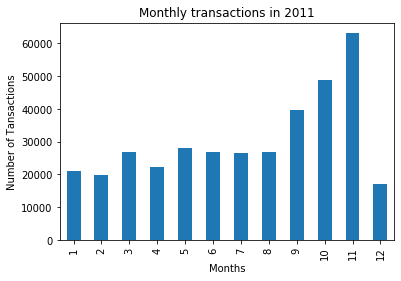

In [23]:
# Number of transactions in different months within 2011 year.
retail_tc[retail_tc.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar')
plt.ylabel("Number of Tansactions")
plt.xlabel("Months")
plt.title("Monthly transactions in 2011");


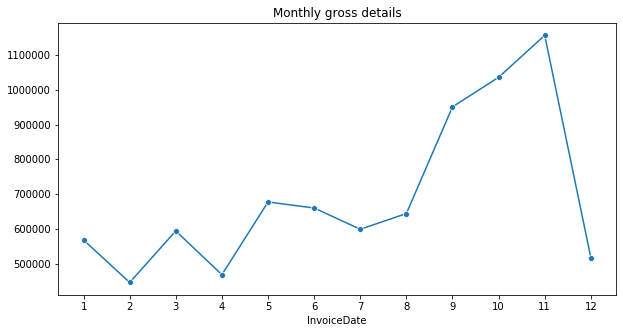

In [24]:
# Monthly Gross
monthlygross = retail_tc[retail_tc.InvoiceDate.dt.year==2011].groupby(retail_tc.InvoiceDate.dt.month).TotalCost.sum()
plt.figure(figsize=(10,5))
sns.lineplot(y=monthlygross.values,x=monthlygross.index, marker='o');
plt.title("Monthly gross details")
plt.xticks(range(1,13))
plt.show();

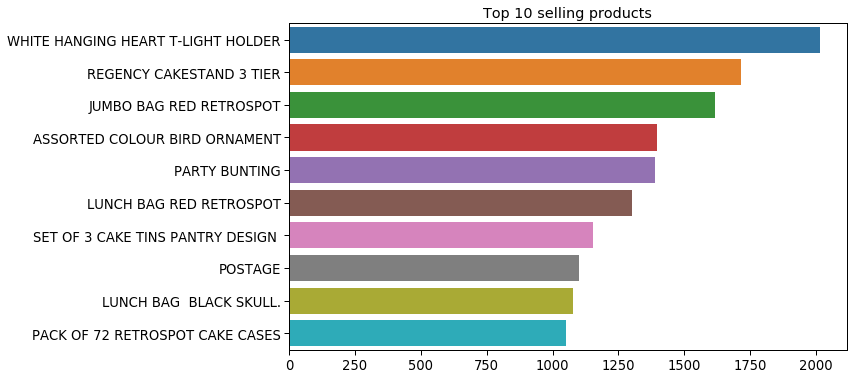

In [25]:
# Top10 Products
top10products = retail_tc['Description'].value_counts()[:10]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top10products.index,
            x = top10products.values)
plt.title("Top 10 selling products")
plt.show();


In [26]:
#Cohort Analysis
cohort = rfm_retail.copy()

In [27]:
#Assign monthly cohort

def get_month(x):
    return dt.datetime(x.year,x.month,1) 

# Create InvoiceMonth column
cohort['InvoiceMonth'] = cohort['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
grouping = cohort.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceMonth value to the dataset
cohort['CohortMonth'] = grouping.transform('min')

In [28]:
#Calculate time offset in months
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [29]:
# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

In [30]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

In [31]:
#Calculate retention rate
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

In [32]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

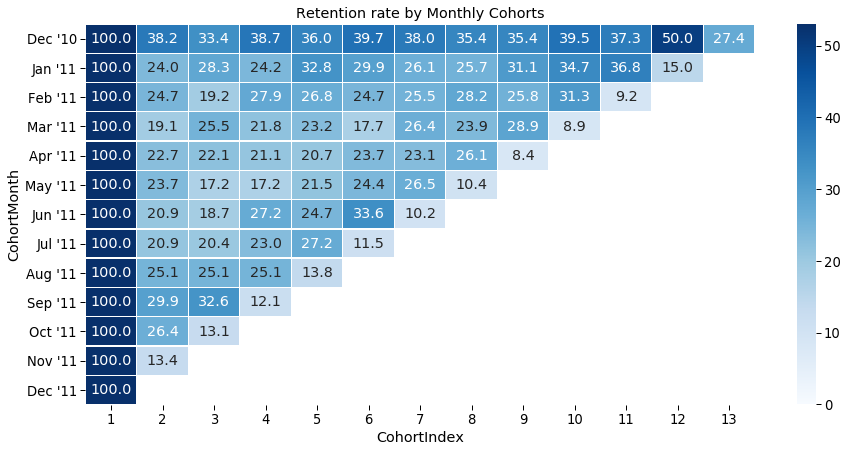

In [33]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

# Initialize inches plot figure
plt.figure(figsize=(15,7))

# Add a title
plt.title('Retention rate by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention,
            annot = True,
            cmap = "Blues",
            vmin = 0.0,
#             vmax = 0.5,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show();

In [34]:
# Calculating average price per cohort
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price.round(1)
average_price.index = average_price.index.date

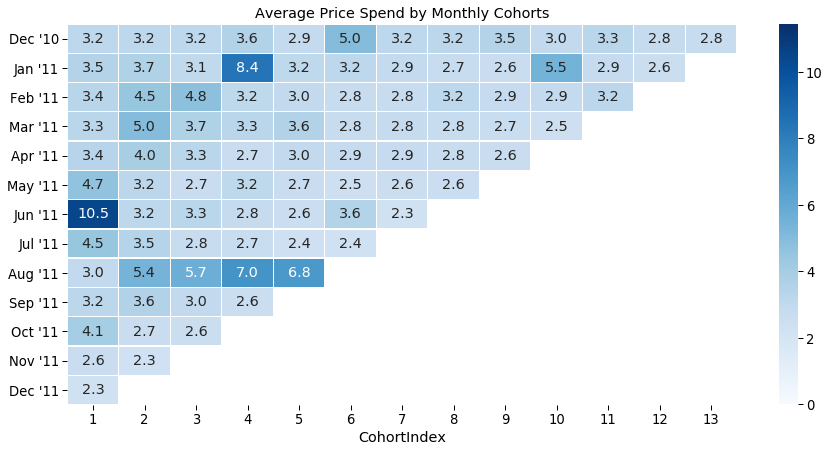

In [91]:
# Initialize plot figure
plt.figure(figsize=(15, 7))

# Add a title
plt.title('Average Price Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_price,
            annot=True,
            vmin = 0.0,
#             vmax =20,
            cmap='Blues',
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
plt.show();


In [36]:
# Calculating average quantity per cohort
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the Quantity column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
# average_quantity.round(1)
# average_quantity.index = average_quantity.index.date

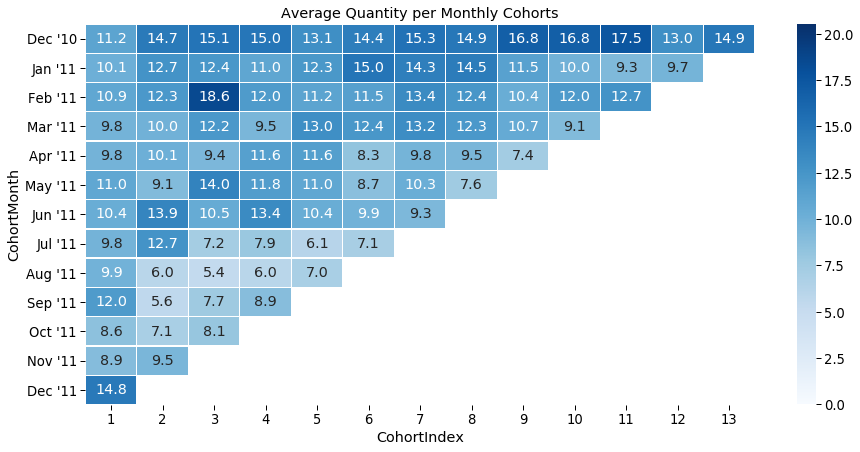

In [37]:
# Initialize plot figure
plt.figure(figsize=(15, 7))

# Add a title
plt.title('Average Quantity per Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_quantity,
            annot=True,
            vmin = 0.0,
            cmap='Blues',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
plt.show();



In [38]:
# RFM Analysis
# displaying last date
rfm_retail['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [39]:
# Setting last date as today's date 
current_date = dt.date(2011,12,9)

In [40]:
# Creating  date column 
rfm_retail['Purchase_Date'] = rfm_retail.InvoiceDate.dt.date

In [41]:
recency = rfm_retail.groupby('CustomerID')['Purchase_Date'].max().reset_index()

In [42]:
# Creating separate column for date.
recency = recency.assign(Current_Date = current_date)

In [43]:
# Computing recency
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)

In [44]:
recency.head()

,CustomerID,Purchase_Date,Current_Date,Recency
0,12346,2011-01-18,2011-12-09,325
1,12347,2011-12-07,2011-12-09,2
2,12348,2011-09-25,2011-12-09,75
3,12349,2011-11-21,2011-12-09,18
4,12350,2011-02-02,2011-12-09,310


In [45]:
# Removing Purchase_date and Current_date columns
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)

In [46]:
# Calculating frequency
frequency = rfm_retail.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'Frequency'})

In [47]:
frequency.head()

,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [48]:
# Create a separate column for Total Cost of Unit purchased
rfm_retail['TotalCost'] = rfm_retail.Quantity * rfm_retail.UnitPrice

In [49]:
monetary = rfm_retail.groupby('CustomerID').TotalCost.sum().reset_index().rename(columns={'TotalCost':'Monetary'})

In [50]:
monetary.head()

,CustomerID,Monetary
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [51]:
# Combining RFM
temp_ = recency.merge(frequency, on='CustomerID')
rfmtable = temp_.merge(monetary, on='CustomerID')
rfmtable.set_index('CustomerID',inplace=True)
rfmtable.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,2,0.00
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40


In [52]:
# RFM Percentiles
quantiles = rfmtable.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,16.0,1.0,291.795
0.50,50.0,3.0,644.070
0.75,143.0,5.0,1608.335


In [53]:
# Let's convert quartile information into a dictionary so that cutoffs can be picked up.
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary': {0.25: 291.79499999999996,
  0.5: 644.0700000000002,
  0.75: 1608.335}}

In [54]:
# Creation of RFM Segments
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [55]:

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [56]:
rfmseg = rfmtable.copy()
rfmseg['R_quartile'] = rfmseg['Recency'].apply(RScore, args=('Recency',quantiles,))
rfmseg['F_quartile'] = rfmseg['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfmseg['M_quartile'] = rfmseg['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [57]:
rfmseg.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12346,325,2,0.00,1,2,1
12347,2,7,4310.00,4,4,4
12348,75,4,1797.24,2,3,4
12349,18,1,1757.55,3,1,4
12350,310,1,334.40,1,1,2


In [58]:
rfmseg['RFMScore'] = rfmseg.R_quartile.map(str) \
                            + rfmseg.F_quartile.map(str) \
                            + rfmseg.M_quartile.map(str)
rfmseg.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFMScore
CustomerID,,,,,,,
12346,325,2,0.00,1,2,1,121
12347,2,7,4310.00,4,4,4,444
12348,75,4,1797.24,2,3,4,234
12349,18,1,1757.55,3,1,4,314
12350,310,1,334.40,1,1,2,112


In [59]:
# Reset the index to create a customer_ID column
rfmseg.reset_index(inplace=True)

In [60]:
# Create a dictionary for each segment to map them against each customer
seg_dict = {
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Spenders':'334',        # High monetary value but good recency and frequency values
    'Almost Lost':'244',         # Customer's shopping less often now who used to shop a lot
    'Lost':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Low-Score Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}

In [61]:
# Swap the key and value of dictionary
dict_segment = dict(zip(seg_dict.values(),seg_dict.keys()))
# Allocate segments to each customer as per the RFM score mapping
rfmseg['Segment'] = rfmseg.RFMScore.map(lambda x: dict_segment.get(x))
# Allocate all remaining customers to others segment category
rfmseg.Segment.fillna('others', inplace=True)
rfmseg.sample(10)

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFMScore,Segment
3649,17306,10,21,8600.73,4,4,4,444,Best Customers
4025,17813,14,7,1641.79,4,4,4,444,Best Customers
2085,15168,25,1,106.56,3,1,1,311,others
2302,15458,25,1,161.64,3,1,1,311,others
777,13366,50,1,56.16,3,1,1,311,others
1616,14528,37,1,364.22,3,1,2,312,others
1417,14251,1,5,2879.70,4,3,4,434,others
3840,17561,19,1,165.12,3,1,1,311,others
724,13299,268,1,142.50,1,1,1,111,others
4083,17892,56,3,244.10,2,2,1,221,others


In [62]:
# K-means Clustering 
rfmtable.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,91.581199,5.075480,1893.531433
std,100.772139,9.338754,8218.696204
min,0.000000,1.000000,-4287.630000
25%,16.000000,1.000000,291.795000
50%,50.000000,3.000000,644.070000
75%,143.000000,5.000000,1608.335000
max,373.000000,248.000000,279489.020000


In [63]:
# To remove negative values of monetary
# Create a copy of rfm table
new_rfmtable = rfmtable.copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
new_rfmtable.Monetary = new_rfmtable.Monetary + abs(new_rfmtable.Monetary.min()) + 1
new_rfmtable.Recency = new_rfmtable.Recency + abs(new_rfmtable.Recency.min()) + 1

# Check the summary of new values
new_rfmtable.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,92.581199,5.075480,6182.161433
std,100.772139,9.338754,8218.696204
min,1.000000,1.000000,1.000000
25%,17.000000,1.000000,4580.425000
50%,51.000000,3.000000,4932.700000
75%,144.000000,5.000000,5896.965000
max,374.000000,248.000000,283777.650000


In [64]:
# Transform the data before K-Means clustering
from sklearn.preprocessing import StandardScaler

# Taking log first because normalization forces data for negative values
log_df = np.log(new_rfmtable)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
scaledrfm = scaler.fit_transform(log_df)
scaledrfm = pd.DataFrame(data=scaledrfm, index=rfmtable.index, columns=rfmtable.columns)

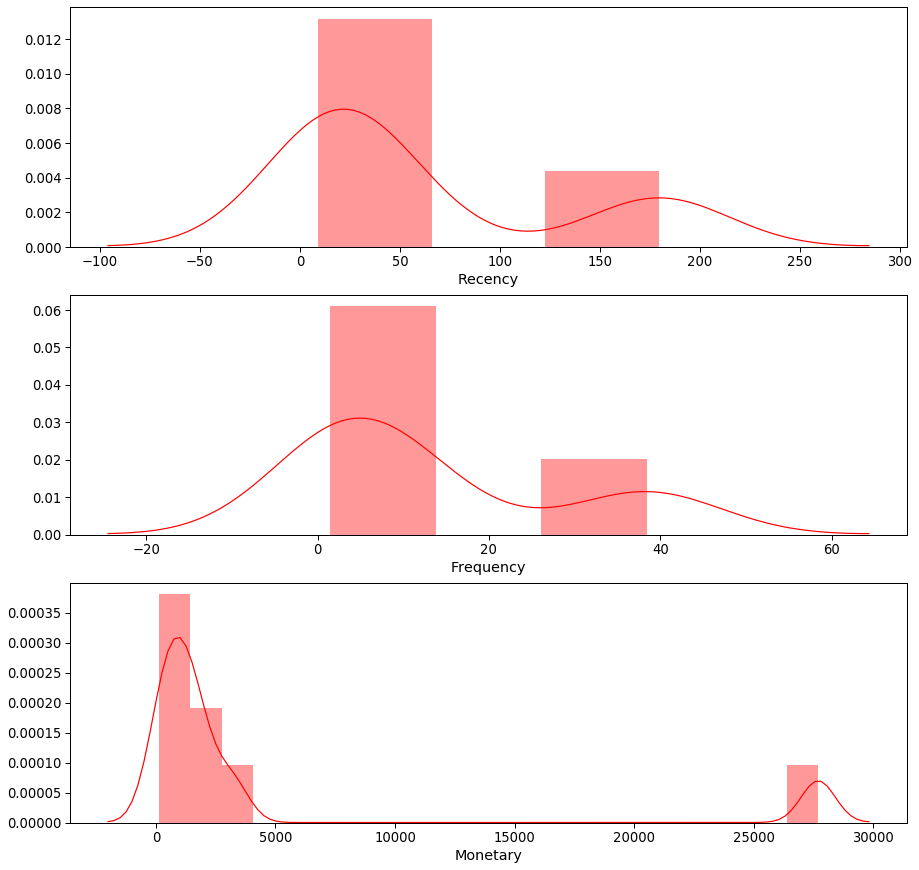

In [96]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfmtable.Recency , color="red", ax=axes[0], axlabel='Recency')
sns.distplot(rfmtable.Frequency , color="red", ax=axes[1], axlabel='Frequency')
sns.distplot(rfmtable.Monetary , color="red", ax=axes[2], axlabel='Monetary')
# plt.xlim(50,75);
plt.show();


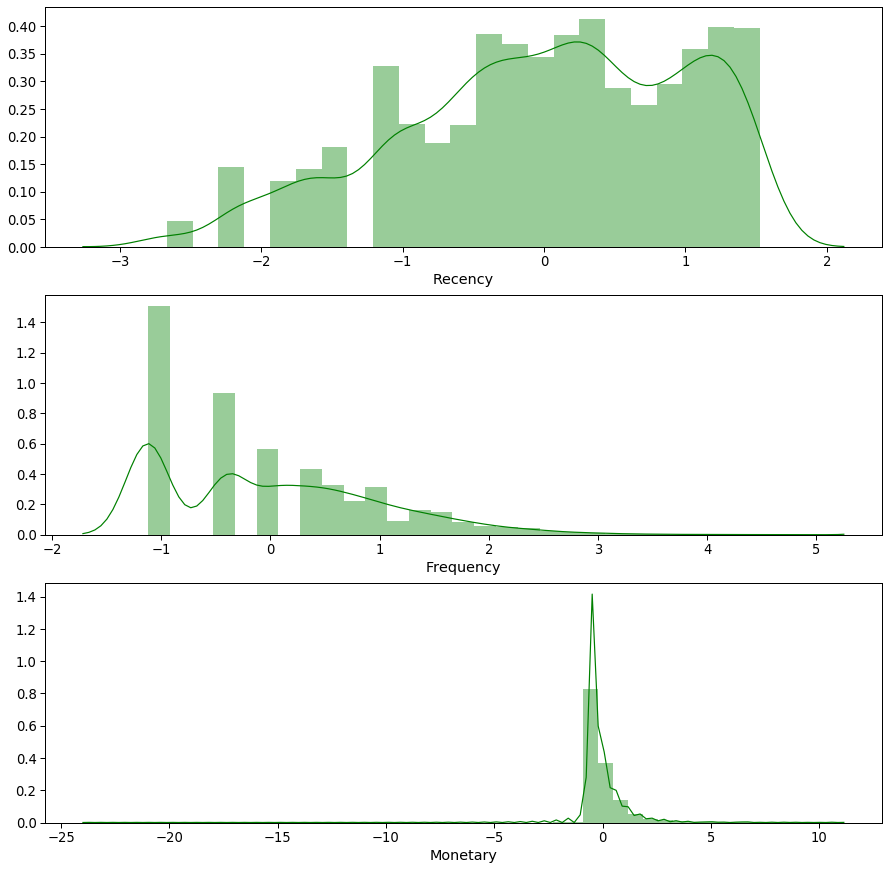

In [95]:
# plotting transformed RFM data
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(scaledrfm.Recency , color="green", ax=axes[0], axlabel='Recency')
sns.distplot(scaledrfm.Frequency , color="green", ax=axes[1], axlabel='Frequency')
sns.distplot(scaledrfm.Monetary , color="green", ax=axes[2], axlabel='Monetary')
#plt.xlim(-4,4)
plt.show();

In [67]:
scaledrfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,1.428946,-0.395992,-0.692911
12347,-1.889472,0.917477,1.219619
12348,0.398257,0.330743,0.269361
12349,-0.582976,-1.122728,0.251372
12350,1.395605,-1.122728,-0.486483


Text(0.5, 1.0, 'Elbow graph')

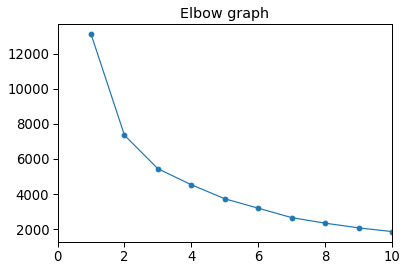

In [68]:
# find WCSS elbow mwthod to find the number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(scaledrfm)
    wcss.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');
plt.xlim(0,10)
plt.title('Elbow graph')

In [69]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(scaledrfm)
cluster_labels = kmeans.labels_

In [70]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [71]:
# Assign the clusters as column to each customer
Clustertable = rfmseg.assign(Cluster = cluster_labels)

In [82]:
# Check counts of records assigned to different clusters
Clustertable.Cluster.value_counts()

2    1781
0    1596
1     874
3     121
Name: Cluster, dtype: int64

In [84]:
rfm_grouped = Clustertable.groupby(['Cluster'])
rfmtable = rfm_grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)
rfmtable

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          39.7       3.5    900.4  1596
1          18.2      10.6   3153.6   874
2         179.7       1.5    412.0  1781
3           9.0      38.4  27698.8   121

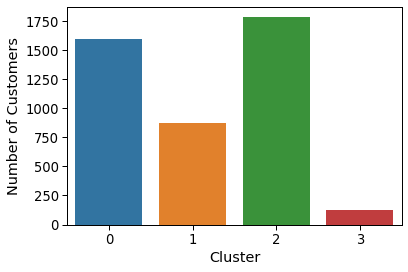

In [85]:
# No of customers in each clusters
rfmtable = rfmtable.reset_index()
sns.barplot(x=rfmtable.Cluster,y=rfmtable['Monetary']['count'])
plt.ylabel('Number of Customers')
plt.show()

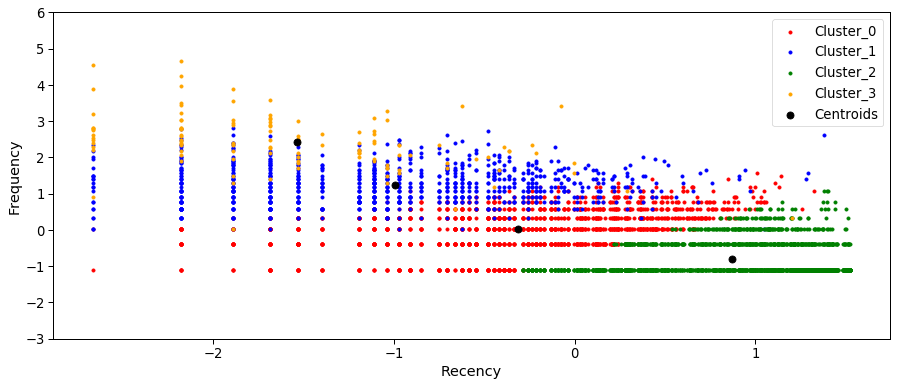

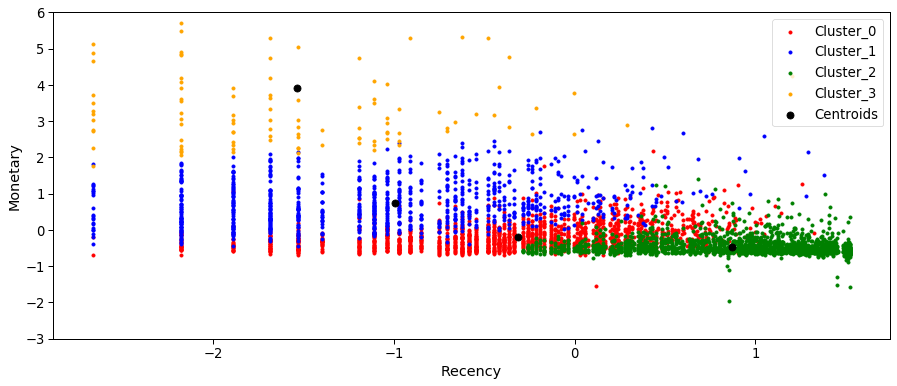

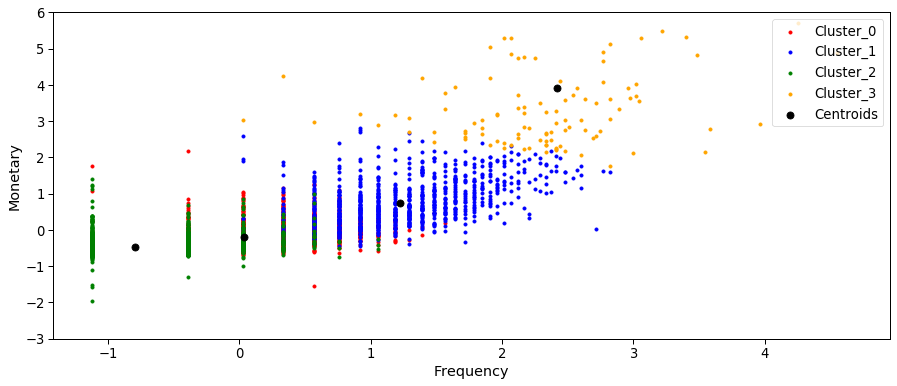

In [86]:
# Plotting two dimesional plots of each attributes respectively.
X = scaledrfm.iloc[:,0:3].values
count=X.shape[1]
for i in range(0,count):
    for j in range(i+1,count):
        plt.figure(figsize=(15,6));
        plt.scatter(X[cluster_labels == 0, i], X[cluster_labels == 0, j], s = 10, c = 'red', label = 'Cluster_0')
        plt.scatter(X[cluster_labels == 1, i], X[cluster_labels == 1, j], s = 10, c = 'blue', label = 'Cluster_1')
        plt.scatter(X[cluster_labels == 2, i], X[cluster_labels == 2, j], s = 10, c = 'green', label = 'Cluster_2')
        plt.scatter(X[cluster_labels == 3, i], X[cluster_labels == 3, j], s = 10, c = 'orange', label = 'Cluster_3')
        plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,j], s = 50, c = 'black', label = 'Centroids')
        plt.xlabel(scaledrfm.columns[i])
        plt.ylabel(scaledrfm.columns[j])
        plt.ylim(-3,6)
        plt.legend(loc='upper right')  
        plt.show();

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          39.7       3.5    900.4  1596
1          18.2      10.6   3153.6   874
2         179.7       1.5    412.0  1781
3           9.0      38.4  27698.8   121

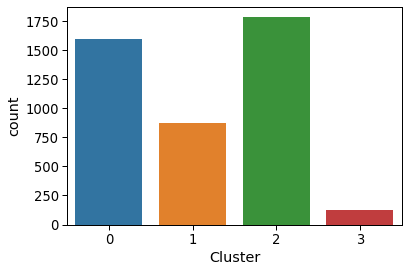

In [91]:
#Snake Plot
# Assign Cluster values to each customer in normalized dataframe
scaledrfm = scaledrfm.assign(Cluster = cluster_labels)

# Melt normalized dataframe into long form to have all metric in same column
combine = pd.melt(scaledrfm.reset_index(),
                      id_vars=['CustomerID','Cluster'],
                      value_vars=['Recency', 'Frequency', 'Monetary'],
                      var_name='Metric',
                      value_name='Value')
scaledrfm.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,1.428946,-0.395992,-0.692911,2
12347,-1.889472,0.917477,1.219619,1
12348,0.398257,0.330743,0.269361,0
12349,-0.582976,-1.122728,0.251372,0
12350,1.395605,-1.122728,-0.486483,2


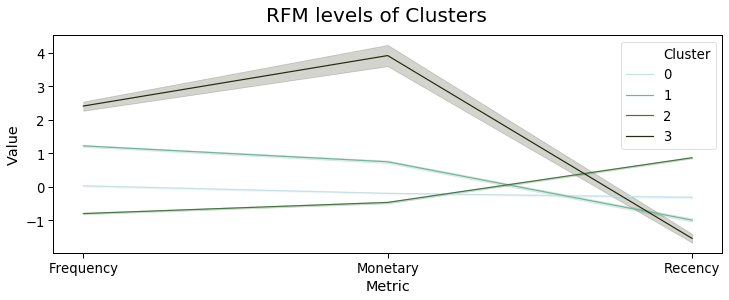

In [111]:
# a snake plot with K-Means
plt.figure(figsize=(12,4))
palette = sns.color_palette("mako_r", 4)
sns.lineplot(x = 'Metric',
             y = 'Value',
             hue = 'Cluster',
             data = combine,
             palette = "ch:4.4,.44")

plt.suptitle("RFM levels of Clusters",fontsize=20)
plt.show();